# Potential Target Features
## Sidney Cannon-Bailey
## 11/7/2020

This notebook loads the merged total dataset from the processed data and calculates a couple target values using the demographic percentages

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# set file location on your local machine
dataLoc = '../data/mergedTotalDataset.csv' #'C:/Users/sidne/OneDrive/Documents/GeorgiaTech/ComputationalDataAnalytics_ISYE6740/Project/Datasets/';


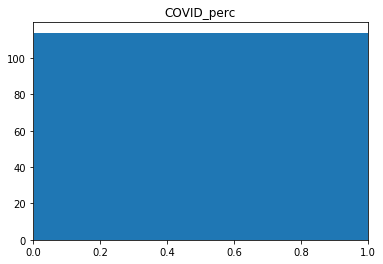

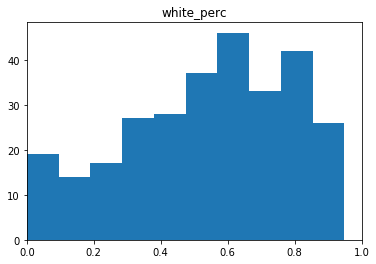

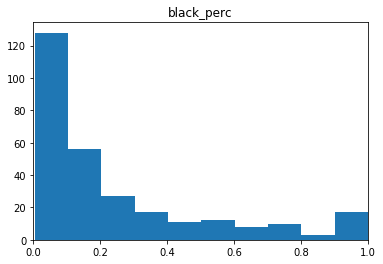

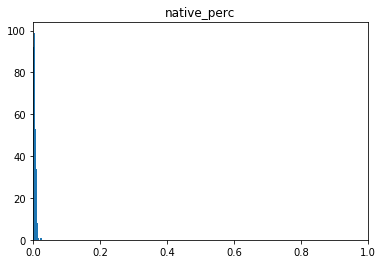

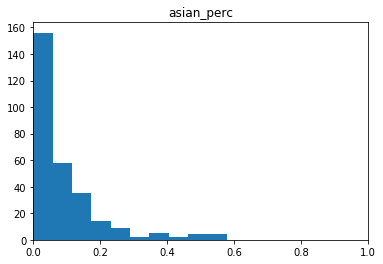

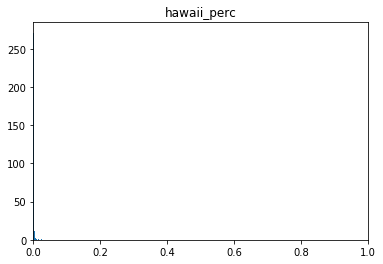

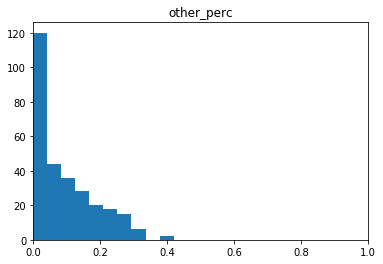

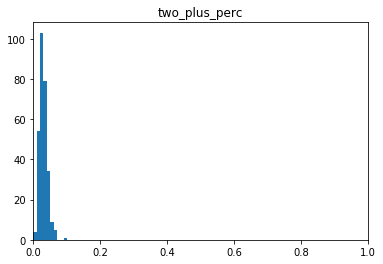

In [10]:
# load the dataset
df = pd.read_csv(dataLoc)

# go through each percentage column and plot a histogram showing the distrbution
for colName in list(df):
    if 'perc' in colName:
        plt.figure()
        plt.hist(df[colName]);
        plt.title(colName);
        plt.xlim([0,1])

In general, the citys appear to be mostly white-majority cities. A couple citys are majority black and none are majority native/hawaiin/2+ races.

I wouldn't consider any of them majority asian either, although there is slightly more range there.

There are almost 3 categorical, target variables I'd like to spin up. First, is a city majority (>= 60%) white, majority (>= 60%) black, and is a city racially diverse (at least 3 races >20%).

In [35]:
# define two of the target variables: majority white and majority black
majorityThresh = 0.51

df['majorityWhite'] = 0;
df.loc[df['white_perc']>=majorityThresh,'majorityWhite'] = 1;

df['majorityBlack'] = 0;
df.loc[df['black_perc']>=majorityThresh,'majorityBlack'] = 1;


Text(0.5, 1.0, 'Histogram of majority black zip codes')

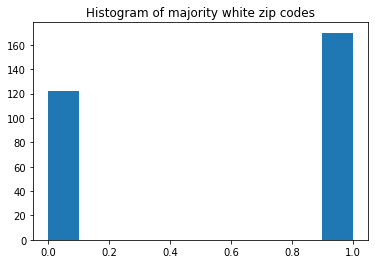

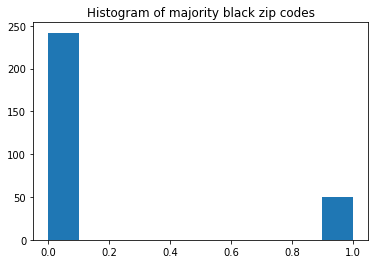

In [36]:
plt.figure()
plt.hist(df['majorityWhite'])
plt.title("Histogram of majority white zip codes")

plt.figure()
plt.hist(df['majorityBlack'])
plt.title("Histogram of majority black zip codes")


In [47]:
df.loc[df['majorityWhite']==1,'PlaceName'].unique()

array(['San Francisco, CA', 'Boston, MA', 'Houston, TX', 'Miami, FL',
       'Atlanta, GA', 'Chicago, IL'], dtype=object)

In [48]:
df.loc[df['majorityBlack']==1,'PlaceName'].unique()

array(['Boston, MA', 'Houston, TX', 'Miami, FL', 'Atlanta, GA',
       'Chicago, IL'], dtype=object)

About what we'd expect to see, about 1/2 the cities are majority white and a much smaller amount majority black. All 6 cities have some zip code(s) that have majority white residents. San Francisco is the only city with no zip codes with a majority black residents.

In [43]:
df['raciallyDiverse'] = 0;
diverseThresh = 0.15;
# a ciy is considered "racially diverse" if any at least three cities have >= 15% population
# There are 4 groups of races that reach this 20% mark, so four potential combos that qualify as racially diverse
# 1,2,3 OR 2,3,4 OR 1,2,4 OR 1,3,4
df.loc[(df['white_perc']>=diverseThresh) & (df['black_perc']>=diverseThresh) & (df['asian_perc']>=diverseThresh), 'raciallyDiverse'] = 1
df.loc[(df['white_perc']>=diverseThresh) & (df['black_perc']>=diverseThresh) & (df['other_perc']>=diverseThresh), 'raciallyDiverse'] = 1
df.loc[(df['white_perc']>=diverseThresh) & (df['other_perc']>=diverseThresh) & (df['asian_perc']>=diverseThresh), 'raciallyDiverse'] = 1
df.loc[(df['other_perc']>=diverseThresh) & (df['black_perc']>=diverseThresh) & (df['asian_perc']>=diverseThresh), 'raciallyDiverse'] = 1

(array([239.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  53.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

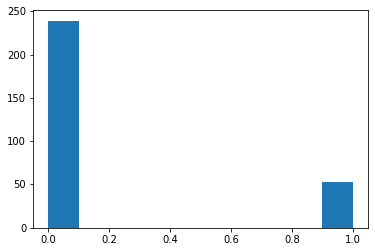

In [44]:
plt.figure()
plt.hist(df['raciallyDiverse'])

In [49]:
df.loc[df['raciallyDiverse']==1,'PlaceName'].unique()

array(['San Francisco, CA', 'Boston, MA', 'Houston, TX', 'Atlanta, GA',
       'Chicago, IL'], dtype=object)

Miami is the only city without any racially diverse zip codes? I'm a bit surprised by that, to be honest. I would have thought at least one zip code was racialy diverse. This could be that the criteria is too strict, or might be a result of the census data not allowing for hispanic as a race (which is described in more detail here: https://www.census.gov/topics/population/hispanic-origin/about/comparing-race-and-hispanic-origin.html). It's not super clear from the article, but I believe the census asks the question about being hispanic separate from race, so the data I found may not have all the info we want (or maybe so, do we want to classify hispanic as a race? I don't know enough to push one way or the other.)